<a href="https://colab.research.google.com/github/apskis/data_science_ai_colab_books/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression, Decision Boundaries, and Confusion Matrix

**Topics we'll cover:**
1. Logistic Regression
2. Decision Boundaries
3. Confusion Matrix

**Learning objectives:**
- Understand how logistic regression works for classification.
- Visualize decision boundaries in 2D.
- Evaluate classification performance using a confusion matrix.

We'll use Python libraries like `numpy`, `matplotlib`, and `scikit-learn` for hands-on demos.

## From Linear Regression to Logistic Regression

### Linear Regression Recap
- Linear regression predicts a **continuous outcome** using a linear combination of features:
  
  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
  $$

- Example: predicting house prices, sales revenue, or exam scores.

### The Problem with Classification
- What if we want to predict a **binary outcome** (e.g., spam vs. not spam)?
- Linear regression can output any real number, but probabilities must be between **0 and 1**.
- Using linear regression directly for classification can lead to nonsensical predictions (like probabilities < 0 or > 1).

### Logistic Regression Solution
- Logistic regression keeps the **linear combination of features**:
  
  $$
  z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
  $$

- Instead of predicting $z$ directly, we pass it through the **sigmoid function**:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- This squashes the output into the range [0, 1], so it can be interpreted as a **probability**.

### Decision Rule
- If $\sigma(z) \geq 0.5$, predict **Class 1**.
- If $\sigma(z) < 0.5$, predict **Class 0**.

### Key Insight
- Logistic regression is essentially **linear regression + a sigmoid transformation**.
- This makes it suitable for classification tasks while still being interpretable.


- Logistic regression is used for **binary classification**.
- It models the probability that an instance belongs to a class.
- The logistic (sigmoid) function maps values into the range [0, 1].




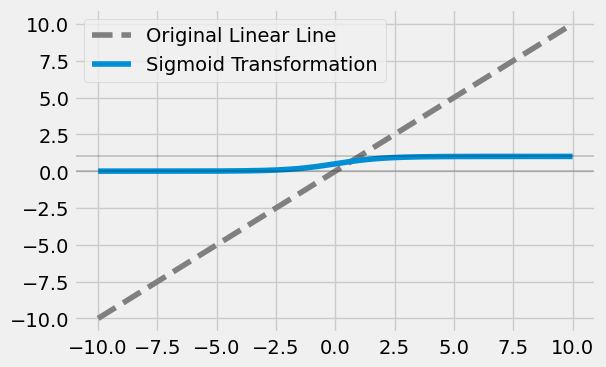

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate x values
x = np.linspace(-10, 10, 200)

linear_outputs = x

# sigmoid
sigmoid = 1 / (1 + np.exp(-x))

# plot
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))
    plt.plot(x, linear_outputs, linestyle='--', color='gray', label='Original Linear Line')
    plt.plot(x, sigmoid, label='Sigmoid Transformation')
    plt.axhline(0, color='black', linewidth=0.25)
    plt.axhline(1, color='black', linewidth=0.25)
    plt.legend()

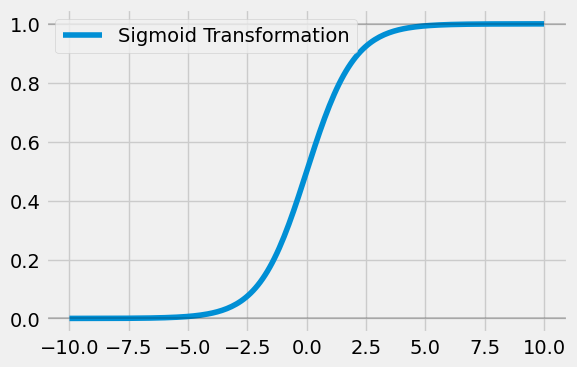

In [ ]:
# plot
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))
    #plt.plot(x, linear_outputs, linestyle='--', color='gray', label='Original Linear Line')
    plt.plot(x, sigmoid, label='Sigmoid Transformation')
    plt.axhline(0, color='black', linewidth=0.25)
    plt.axhline(1, color='black', linewidth=0.25)
    plt.legend()

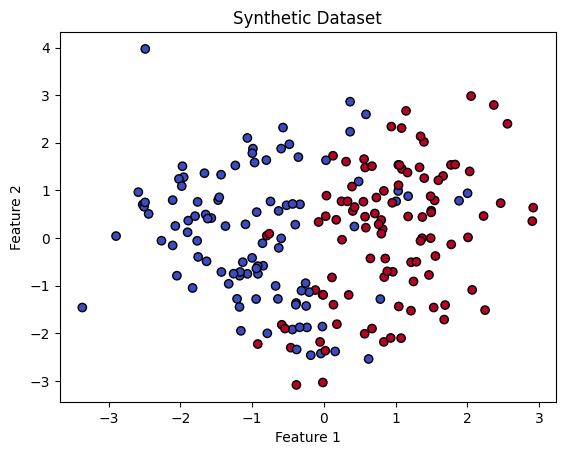

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 2), (50, 2), (150,), (50,))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

test_preds = lr.predict(X_test)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': test_preds,
              'Probability of Class 1': lr.predict_proba(X_test)[:,1]}).head()

,Actual,Predicted,Probability of Class 1
0,1,1,0.977017
1,0,1,0.587834
2,1,1,0.809741
3,1,1,0.678253
4,1,0,0.447772


In [ ]:
# 0 = they do not have the medical diagnosis
# 1 = they do have the medical diagnosis

# 49% probability of having the medical diagnosis

# false positive = predict patient to have the diagnosis, but they do not
# false negative = predict patient to not have the diagnosis, but they do

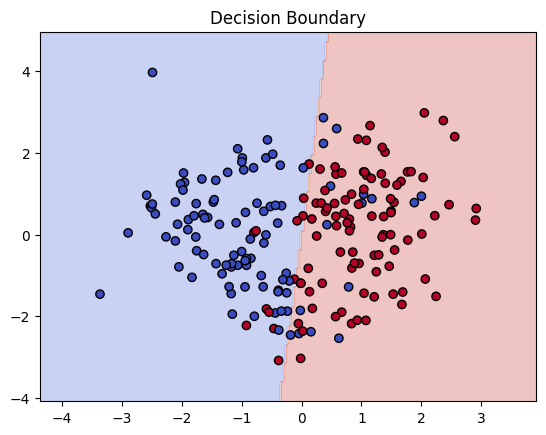

In [ ]:
def plot_decision_boundary(X, y, model):
    # Create grid
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict probabilities
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, lr)


## Confusion Matrix

A confusion matrix summarizes classification results:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |

- **Rows = actual classes**
- **Columns = predicted classes**

---

### Metrics Derived

1. **Accuracy**  
   Measures overall correctness of the classifier.  
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precision**  
   Of all predicted positives, how many were correct?  
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall (Sensitivity)**  
   Of all actual positives, how many did we correctly identify?  
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

4. **F1-Score**  
   Harmonic mean of precision and recall (balances the two).  
   $$
   \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

---

### Key Insights
- **Accuracy** can be misleading if classes are imbalanced.  
- **Precision** is important when false positives are costly (e.g., spam detection).  
- **Recall** is important when false negatives are costly (e.g., disease detection).  
- **F1-score** balances precision and recall, useful when both matter.



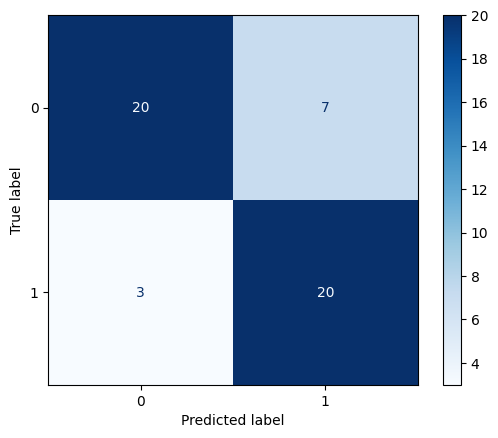

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.74      0.87      0.80        23

    accuracy                           0.80        50
   macro avg       0.81      0.81      0.80        50
weighted avg       0.81      0.80      0.80        50



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = lr.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred), f1_score(y_train, lr.predict(X_train))

(0.8, 0.8831168831168831)

In [ ]:
# when the training scores are higher than the test scores
# should we try increasing the amount of regularization or
# reduce the amount of regularization?

# increase the amount of regularization

In [ ]:
lr_regularization = LogisticRegression(C=0.01)
lr_regularization.fit(X_train, y_train)

y_pred_reg = lr_regularization.predict(X_test)

f1_score(y_test, y_pred_reg), f1_score(y_train, lr_regularization.predict(X_train))

(0.84, 0.9056603773584906)

In [ ]:
# starting to under fit
lr_regularization = LogisticRegression(C=0.001)
lr_regularization.fit(X_train, y_train)

y_pred_reg = lr_regularization.predict(X_test)

f1_score(y_test, y_pred_reg), f1_score(y_train, lr_regularization.predict(X_train))

(0.7666666666666667, 0.8333333333333334)

In [ ]:
df = pd.read_csv('/content/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
cols_of_interest = ['loan_amnt', 'credit_score',
                    'cb_person_cred_hist_length', 'loan_status']

df_ss = df[cols_of_interest]
df_ss.head()

,loan_amnt,credit_score,cb_person_cred_hist_length,loan_status
0,35000.0,561,3.0,1
1,1000.0,504,2.0,0
2,5500.0,635,3.0,1
3,35000.0,675,2.0,1
4,35000.0,586,4.0,1


In [ ]:
# no null values
df_ss.isnull().sum()

,0
loan_amnt,0
credit_score,0
cb_person_cred_hist_length,0
loan_status,0


In [ ]:
# 2 float and 2 integers
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   45000 non-null  float64
 1   credit_score                45000 non-null  int64  
 2   cb_person_cred_hist_length  45000 non-null  float64
 3   loan_status                 45000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


<Axes: xlabel='cb_person_cred_hist_length'>

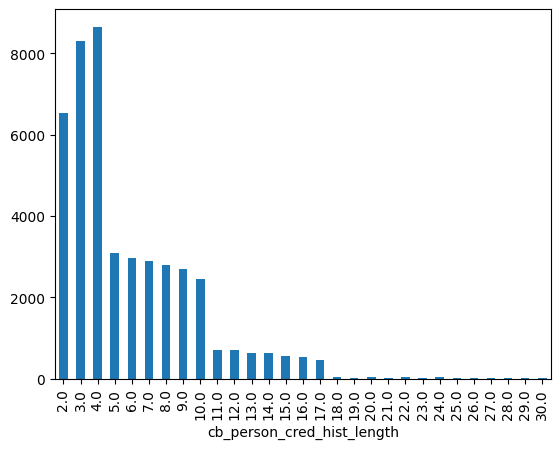

In [ ]:
df_ss['cb_person_cred_hist_length'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='cb_person_cred_hist_length'>

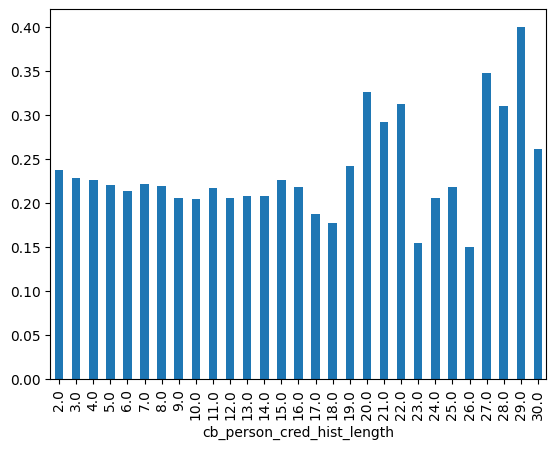

In [ ]:
df_ss.groupby('cb_person_cred_hist_length'
  )['loan_status'].mean().plot(kind='bar')

In [ ]:
df_ss[df_ss['cb_person_cred_hist_length'] <= 15]['loan_status'].mean()

np.float64(0.22234954393362974)

In [ ]:
df_ss[df_ss['cb_person_cred_hist_length'] > 15]['loan_status'].mean()

np.float64(0.21815519765739386)

In [ ]:
df_ss.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,35000.0,9219.576914,6018.933416,500.0,5000.0,8000.0,12000.0,35000.0
1,10000.0,10855.689800,7111.701674,900.0,5000.0,9750.0,15000.0,35000.0


In [ ]:
df_ss['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


In [ ]:
df_ss['credit_score'].describe()

,credit_score
count,45000.000000
mean,632.608756
std,50.435865
min,390.000000
25%,601.000000
50%,640.000000
75%,670.000000
max,850.000000


In [ ]:
df_ss.groupby('loan_status')['credit_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,35000.0,632.814914,50.475294,390.0,602.0,640.0,670.0,850.0
1,10000.0,631.887200,50.293485,431.0,601.0,639.0,669.0,767.0


In [ ]:
# positive = approved for a loan
# negative = not approved for a loan

# false positive = predicting someone to be approved for a loan and
# they should not be (potentially losing money on a loan)

# false negative = predicting someone to not be approved for a loan and
# they should be (potentially losing a customer)

# going to use f1 score

In [ ]:
df_ss.head()

,loan_amnt,credit_score,cb_person_cred_hist_length,loan_status
0,35000.0,561,3.0,1
1,1000.0,504,2.0,0
2,5500.0,635,3.0,1
3,35000.0,675,2.0,1
4,35000.0,586,4.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_ss.drop(columns='loan_status'), df_ss['loan_status'],
    test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,
                               index=X_train.index)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,
                              index=X_test.index)

df_train_scaled.head()

,loan_amnt,credit_score,cb_person_cred_hist_length
24224,-0.852070,-0.852310,0.558067
38081,0.861036,-1.051933,-0.737415
2955,-0.915519,-1.550990,-0.737415
30973,-0.717242,1.463316,2.630838
41258,-0.566553,1.583090,1.076260


Text(0.5, 1.0, 'Loan Amount Scaled')

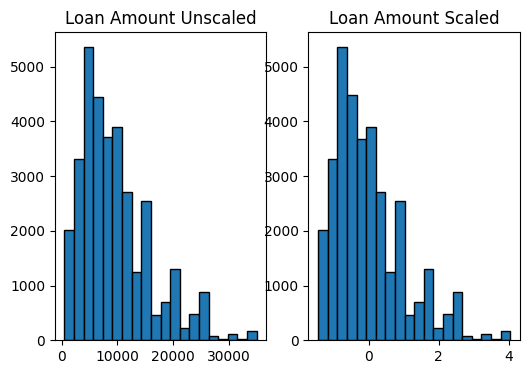

In [ ]:
# make subplots with histogram of loan amount and loan amount scaled

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.hist(X_train['loan_amnt'], bins=20, edgecolor='k')
plt.title('Loan Amount Unscaled')

plt.subplot(1, 2, 2)
plt.hist(df_train_scaled['loan_amnt'], bins=20, edgecolor='k')
plt.title('Loan Amount Scaled')

In [ ]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,
  index=X_train.index)

In [ ]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,
  index=X_train.index)
# Create a dataframe from the scaled test data
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,
  index=X_test.index)


In [ ]:
from sklearn.metrics import f1_score

baseline_lr = LogisticRegression()
baseline_lr.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, baseline_lr.predict(X_test_scaled))
train_f1 = f1_score(y_train, baseline_lr.predict(X_train_scaled))

print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.0
Train F1 Score 0.0


In [ ]:
baseline_lr.score(X_test_scaled, y_test)

0.776

In [ ]:
df_ss['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


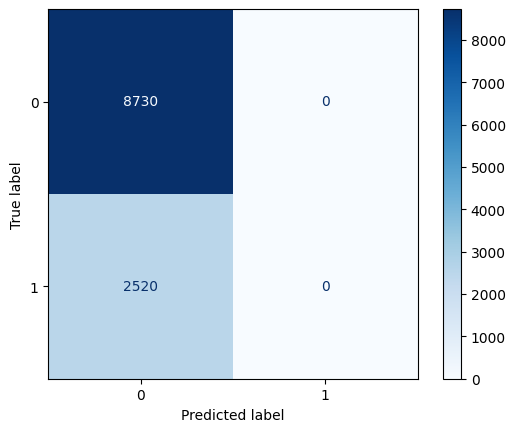

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      8730
           1       0.00      0.00      0.00      2520

    accuracy                           0.78     11250
   macro avg       0.39      0.50      0.44     11250
weighted avg       0.60      0.78      0.68     11250



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = baseline_lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
df_ss['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:
lr_balanced = LogisticRegression(class_weight='balanced')
lr_balanced.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, lr_balanced.predict(X_test_scaled))
train_f1 = f1_score(y_train, lr_balanced.predict(X_train_scaled))
print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.3415554265815438
Train F1 Score 0.34339531514127025


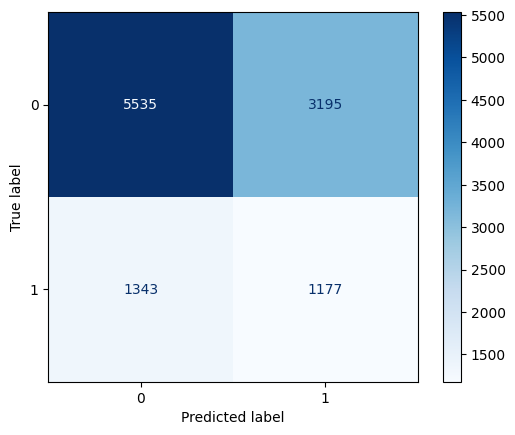

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      8730
           1       0.27      0.47      0.34      2520

    accuracy                           0.60     11250
   macro avg       0.54      0.55      0.53     11250
weighted avg       0.68      0.60      0.63     11250



In [ ]:
# Confusion matrix
y_pred = lr_balanced.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
lr_balanced = LogisticRegression(class_weight={0: 1, 1: 5})
lr_balanced.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, lr_balanced.predict(X_test_scaled))
train_f1 = f1_score(y_train, lr_balanced.predict(X_train_scaled))
print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.36543720895853354
Train F1 Score 0.36217045061087205


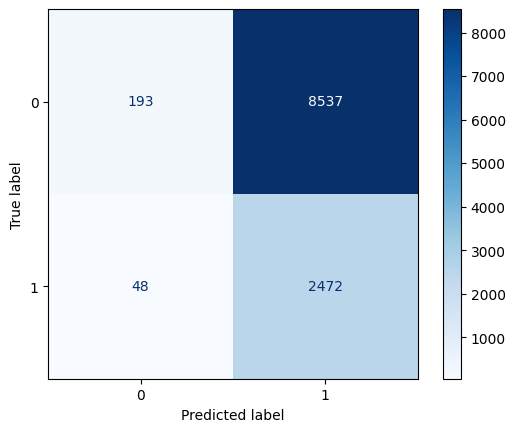

              precision    recall  f1-score   support

           0       0.80      0.02      0.04      8730
           1       0.22      0.98      0.37      2520

    accuracy                           0.24     11250
   macro avg       0.51      0.50      0.20     11250
weighted avg       0.67      0.24      0.12     11250



In [ ]:
# Confusion matrix
y_pred = lr_balanced.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
lr_balanced = LogisticRegression(class_weight={0: 1, 1: 2})
lr_balanced.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, lr_balanced.predict(X_test_scaled))
train_f1 = f1_score(y_train, lr_balanced.predict(X_train_scaled))
print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.11851851851851852
Train F1 Score 0.10679722190595468


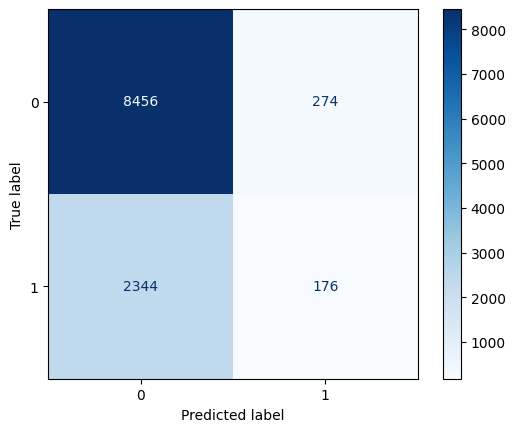

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      8730
           1       0.39      0.07      0.12      2520

    accuracy                           0.77     11250
   macro avg       0.59      0.52      0.49     11250
weighted avg       0.70      0.77      0.70     11250



In [ ]:
# Confusion matrix
y_pred = lr_balanced.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
LogisticRegression(C=0.001, class_weight=None)
LogisticRegression(C=0.001, class_weight='balanced')

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3},
                     {0: 1, 1: 4}]
}

gridsearch = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=param_grid,
                          scoring='f1',
                          n_jobs=-1, verbose=4,
                          cv=5)

gridsearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 368 ms, sys: 292 ms, total: 660 ms
Wall time: 7.71 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4}]},
             scoring='f1', verbose=4)

In [ ]:
gridsearch.best_score_

np.float64(0.3524754025881334)

In [ ]:
gridsearch.best_params_

{'C': 0.001, 'class_weight': {0: 1, 1: 4}}

In [ ]:
gridsearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
gridsearch.cv_results_['rank_test_score']

array([25,  7, 24, 18,  1, 25,  8, 23, 17,  2, 25,  9, 19, 13,  3, 25,  9,
       20, 14,  6, 25,  9, 21, 14,  4, 25,  9, 21, 14,  4], dtype=int32)

In [ ]:
output = pd.DataFrame({'parmams': gridsearch.cv_results_['params'],
                       'score': gridsearch.cv_results_['mean_test_score']})
output.sort_values('score', ascending=False)

,parmams,score
4,"{'C': 0.001, 'class_weight': {0: 1, 1: 4}}",0.352475
9,"{'C': 0.01, 'class_weight': {0: 1, 1: 4}}",0.352310
14,"{'C': 0.1, 'class_weight': {0: 1, 1: 4}}",0.351843
24,"{'C': 10, 'class_weight': {0: 1, 1: 4}}",0.351833
29,"{'C': 100, 'class_weight': {0: 1, 1: 4}}",0.351833
19,"{'C': 1, 'class_weight': {0: 1, 1: 4}}",0.351820
1,"{'C': 0.001, 'class_weight': 'balanced'}",0.343865
6,"{'C': 0.01, 'class_weight': 'balanced'}",0.343533
26,"{'C': 100, 'class_weight': 'balanced'}",0.343437
21,"{'C': 10, 'class_weight': 'balanced'}",0.343437


In [ ]:
gridsearch.cv_results_['mean_test_score']

array([0.43768744, 0.52712962, 0.46257934, 0.55626604, 0.439064  ,
       0.43768744, 0.52668797, 0.48339602, 0.55620921, 0.4476228 ,
       0.43768744, 0.52661831, 0.48477288, 0.55612843, 0.44815191,
       0.43768744, 0.52661831, 0.48472763, 0.5560627 , 0.44818997,
       0.43768744, 0.52661831, 0.48468246, 0.5560627 , 0.44821451,
       0.43768744, 0.52661831, 0.48468246, 0.5560627 , 0.44821451])

In [ ]:
gridsearch.cv_results_['params']

[{'C': 0.001, 'class_weight': None},
 {'C': 0.001, 'class_weight': 'balanced'},
 {'C': 0.001, 'class_weight': {0: 1, 1: 2}},
 {'C': 0.001, 'class_weight': {0: 1, 1: 3}},
 {'C': 0.001, 'class_weight': {0: 1, 1: 4}},
 {'C': 0.01, 'class_weight': None},
 {'C': 0.01, 'class_weight': 'balanced'},
 {'C': 0.01, 'class_weight': {0: 1, 1: 2}},
 {'C': 0.01, 'class_weight': {0: 1, 1: 3}},
 {'C': 0.01, 'class_weight': {0: 1, 1: 4}},
 {'C': 0.1, 'class_weight': None},
 {'C': 0.1, 'class_weight': 'balanced'},
 {'C': 0.1, 'class_weight': {0: 1, 1: 2}},
 {'C': 0.1, 'class_weight': {0: 1, 1: 3}},
 {'C': 0.1, 'class_weight': {0: 1, 1: 4}},
 {'C': 1, 'class_weight': None},
 {'C': 1, 'class_weight': 'balanced'},
 {'C': 1, 'class_weight': {0: 1, 1: 2}},
 {'C': 1, 'class_weight': {0: 1, 1: 3}},
 {'C': 1, 'class_weight': {0: 1, 1: 4}},
 {'C': 10, 'class_weight': None},
 {'C': 10, 'class_weight': 'balanced'},
 {'C': 10, 'class_weight': {0: 1, 1: 2}},
 {'C': 10, 'class_weight': {0: 1, 1: 3}},
 {'C': 10, 'class

In [ ]:
lr_best = LogisticRegression(C=0.001, class_weight={0: 1, 1: 3})
lr_best.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, lr_best.predict(X_test_scaled), average='macro')
train_f1 = f1_score(y_train, lr_best.predict(X_train_scaled), average='macro')

print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.5531193103915002
Train F1 Score 0.5564173086485773


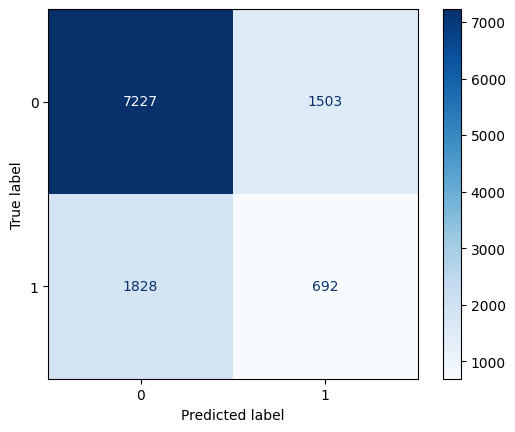

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      8730
           1       0.32      0.27      0.29      2520

    accuracy                           0.70     11250
   macro avg       0.56      0.55      0.55     11250
weighted avg       0.69      0.70      0.70     11250



In [ ]:
# Confusion matrix
y_pred = lr_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
df.groupby('loan_status')['cb_person_cred_hist_length'].mean()

,cb_person_cred_hist_length
loan_status,
0,5.898286
1,5.759700


In [ ]:
pd.DataFrame({'feature': X_train.columns,
              'coef': lr_best.coef_[0]})

,feature,coef
0,loan_amnt,0.230323
1,credit_score,-0.016442
2,cb_person_cred_hist_length,-0.038165


In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
# add more features

cols_of_interest = ['loan_amnt', 'credit_score',
                    'cb_person_cred_hist_length',
                    'person_age', 'person_income', 'person_emp_exp',
                    'loan_int_rate',
                    'loan_status']

df_ss = df[cols_of_interest]

In [ ]:
df_ss.isnull().sum()

,0
loan_amnt,0
credit_score,0
cb_person_cred_hist_length,0
person_age,0
person_income,0
person_emp_exp,0
loan_int_rate,0
loan_status,0


In [ ]:
df_ss.dtypes

,0
loan_amnt,float64
credit_score,int64
cb_person_cred_hist_length,float64
person_age,float64
person_income,float64
person_emp_exp,int64
loan_int_rate,float64
loan_status,int64


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_ss.drop(columns='loan_status'), df_ss['loan_status'],
    test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33750, 7), (11250, 7), (33750,), (11250,))

In [ ]:
# standard scaler on data

# fit the standard scaler on the training data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

# transform on the test data
X_test_scaled = ss.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,
  index=X_train.index)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,
  index=X_test.index)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, lr.predict(X_test_scaled), average='macro')
train_f1 = f1_score(y_train, lr.predict(X_train_scaled), average='macro')

print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.674294375439951
Train F1 Score 0.6766126736915374


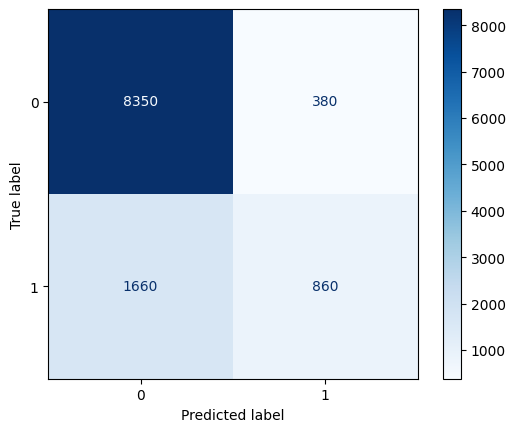

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8730
           1       0.69      0.34      0.46      2520

    accuracy                           0.82     11250
   macro avg       0.76      0.65      0.67     11250
weighted avg       0.80      0.82      0.79     11250



In [ ]:
# Confusion matrix
y_pred = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
pd.DataFrame({'feature': X_train.columns,
              'coef': lr.coef_[0]})

,feature,coef
0,loan_amnt,0.663970
1,credit_score,-0.021761
2,cb_person_cred_hist_length,-0.010281
3,person_age,0.092388
4,person_income,-2.565004
5,person_emp_exp,-0.074854
6,loan_int_rate,0.894093


In [ ]:
df.groupby('loan_status')['loan_int_rate'].mean()

,loan_int_rate
loan_status,
0,10.477981
1,12.856794


In [ ]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_scaled, y_train)

test_f1 = f1_score(y_test, lr.predict(X_test_scaled), average='macro')
train_f1 = f1_score(y_train, lr.predict(X_train_scaled), average='macro')

print('Test F1 Score', test_f1)
print('Train F1 Score', train_f1)

Test F1 Score 0.6636539561714018
Train F1 Score 0.6712473573211006


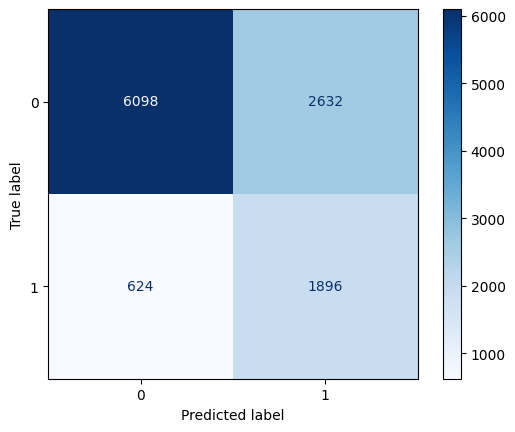

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      8730
           1       0.42      0.75      0.54      2520

    accuracy                           0.71     11250
   macro avg       0.66      0.73      0.66     11250
weighted avg       0.80      0.71      0.73     11250



In [ ]:
# Confusion matrix
y_pred = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred))